In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

05/24/2020 16:17:15 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/24/2020 16:17:18 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/24/2020 16:17:19 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/24/2020 16:17:19 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/24/2020 16:17:20 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

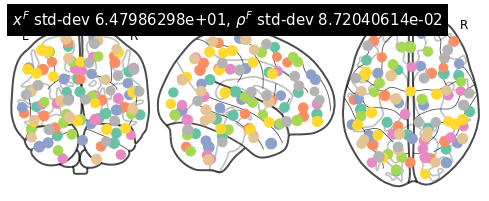

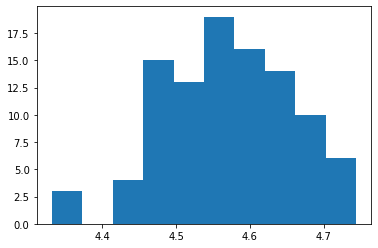

(<nilearn.plotting.displays.OrthoProjector at 0x7f79efb422d0>,
 tensor([[-51.8760, -26.0649,  15.2501],
         [ 37.9317, -67.8142, -28.9877],
         [ 51.3097,   9.6412,  35.4762],
         [ 26.8508,  59.9090,  -8.4974],
         [ -2.4707, -52.6672,  27.7652],
         [-45.7350,  25.7285,  -1.3231],
         [-24.0713, -39.6166, -31.7748],
         [-12.6022,  15.4854,  62.0872],
         [ 62.8072, -28.2630,  -9.7125],
         [ 19.0673, -45.9362, -13.9062],
         [ -0.1682,  40.1679,  14.5311],
         [-14.1518, -91.2051,  14.3359],
         [ 35.5822,  11.6375, -39.4581],
         [-26.4474, -11.5895, -23.6337],
         [ 36.6073, -59.5338,  45.2364],
         [-39.2165, -63.1290,  37.7902],
         [ 46.2119,  45.4852,  -1.6941],
         [ 22.6842,  11.9504,   5.7913],
         [ 21.8215, -77.5860, -42.9039],
         [-38.2455,  45.7297, -10.9126],
         [-59.1001, -15.8971,  -8.0520],
         [ 35.1157,  17.8306,  51.8933],
         [-12.8118, -43.6156,  66.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/24/2020 16:18:40 [Epoch 1] (8001ms) Posterior free-energy 9.66304256e+09 = KL from prior 5.09324700e+06 - log-likelihood -9.65795123e+09
05/24/2020 16:18:40 Saving checkpoint...
05/24/2020 16:18:48 [Epoch 2] (7687ms) Posterior free-energy 9.39184640e+09 = KL from prior 6.16881875e+05 - log-likelihood -9.39122790e+09
05/24/2020 16:18:55 [Epoch 3] (7597ms) Posterior free-energy 9.22440192e+09 = KL from prior 5.20093562e+05 - log-likelihood -9.22388173e+09
05/24/2020 16:19:03 [Epoch 4] (7594ms) Posterior free-energy 9.10042624e+09 = KL from prior 4.60961219e+05 - log-likelihood -9.09996442e+09
05/24/2020 16:19:10 [Epoch 5] (7631ms) Posterior free-energy 9.01508096e+09 = KL from prior 4.24606188e+05 - log-likelihood -9.01465805e+09
05/24/2020 16:19:18 [Epoch 6] (7658ms) Posterior free-energy 8.95399219e+09 = KL from prior 4.00794906e+05 - log-likelihood -8.95358976e+09
05/24/2020 16:19:26 [Epoch 7] (7605ms) Posterior free-energy 8.90349363e+09 = KL from prior 3.96920062e+05 - log-likeli

Epoch   443: reducing learning rate of group 0 to 5.0000e-03.
Epoch   443: reducing learning rate of group 1 to 5.0000e-03.
Epoch   443: reducing learning rate of group 2 to 5.0000e-03.
Epoch   443: reducing learning rate of group 3 to 5.0000e-03.


05/24/2020 17:15:41 [Epoch 445] (7594ms) Posterior free-energy 6.23054029e+09 = KL from prior 1.80758838e+06 - log-likelihood -6.22873293e+09
05/24/2020 17:15:48 [Epoch 446] (7592ms) Posterior free-energy 6.18758810e+09 = KL from prior 1.77130462e+06 - log-likelihood -6.18581555e+09
05/24/2020 17:15:56 [Epoch 447] (7604ms) Posterior free-energy 6.18526106e+09 = KL from prior 1.75623012e+06 - log-likelihood -6.18350438e+09
05/24/2020 17:16:03 [Epoch 448] (7614ms) Posterior free-energy 6.18446797e+09 = KL from prior 1.73128862e+06 - log-likelihood -6.18273587e+09
05/24/2020 17:16:11 [Epoch 449] (7607ms) Posterior free-energy 6.18371942e+09 = KL from prior 1.71480962e+06 - log-likelihood -6.18200576e+09
05/24/2020 17:16:19 [Epoch 450] (7599ms) Posterior free-energy 6.18318541e+09 = KL from prior 1.72018512e+06 - log-likelihood -6.18146714e+09
05/24/2020 17:16:26 [Epoch 451] (7600ms) Posterior free-energy 6.18293248e+09 = KL from prior 1.71413250e+06 - log-likelihood -6.18121882e+09
05/24/

Epoch   618: reducing learning rate of group 0 to 2.5000e-03.
Epoch   618: reducing learning rate of group 1 to 2.5000e-03.
Epoch   618: reducing learning rate of group 2 to 2.5000e-03.
Epoch   618: reducing learning rate of group 3 to 2.5000e-03.


05/24/2020 17:38:03 [Epoch 620] (7670ms) Posterior free-energy 6.16327526e+09 = KL from prior 1.73496900e+06 - log-likelihood -6.16154061e+09
05/24/2020 17:38:11 [Epoch 621] (7675ms) Posterior free-energy 6.15902720e+09 = KL from prior 1.72248238e+06 - log-likelihood -6.15730432e+09
05/24/2020 17:38:19 [Epoch 622] (7656ms) Posterior free-energy 6.15872870e+09 = KL from prior 1.70916912e+06 - log-likelihood -6.15702016e+09
05/24/2020 17:38:26 [Epoch 623] (7656ms) Posterior free-energy 6.15839949e+09 = KL from prior 1.70602512e+06 - log-likelihood -6.15669350e+09
05/24/2020 17:38:34 [Epoch 624] (7671ms) Posterior free-energy 6.15842816e+09 = KL from prior 1.71116200e+06 - log-likelihood -6.15671757e+09
05/24/2020 17:38:42 [Epoch 625] (7663ms) Posterior free-energy 6.15827098e+09 = KL from prior 1.72534688e+06 - log-likelihood -6.15654605e+09
05/24/2020 17:38:49 [Epoch 626] (7667ms) Posterior free-energy 6.15824691e+09 = KL from prior 1.71910438e+06 - log-likelihood -6.15652813e+09
05/24/

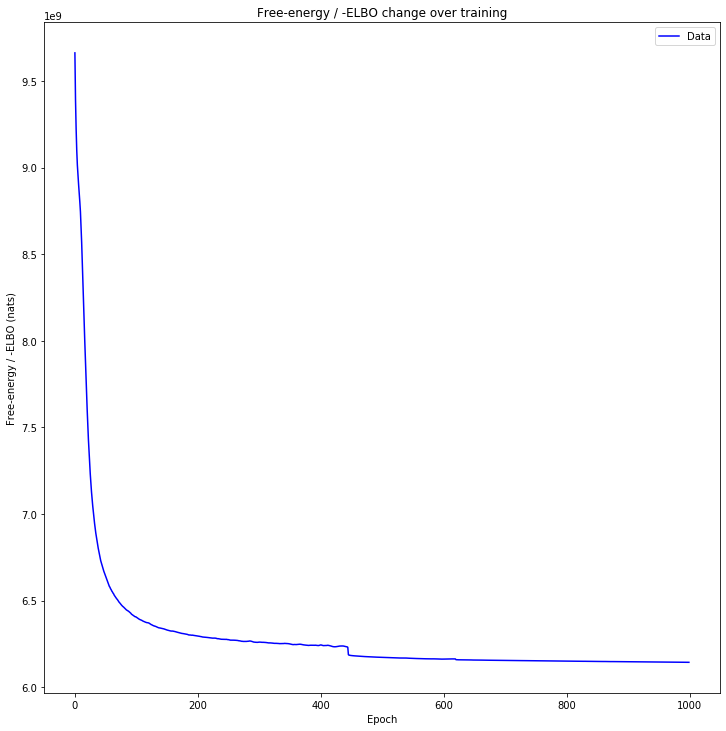

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


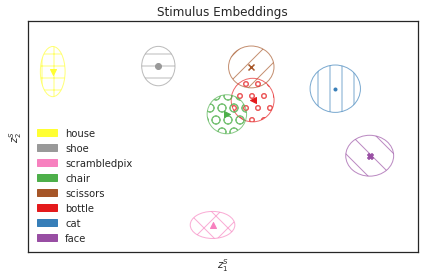

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


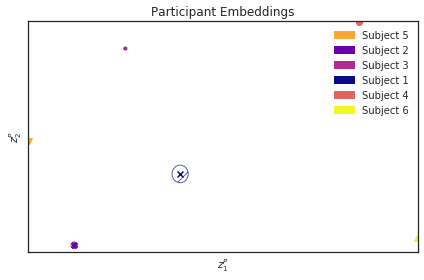

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    return task

05/24/2020 18:27:09 Plotting factors for Participant 2, run 7


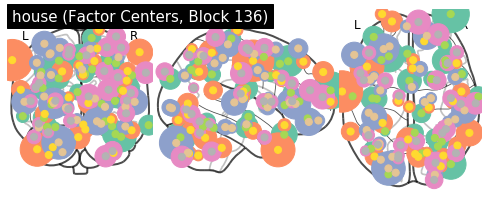

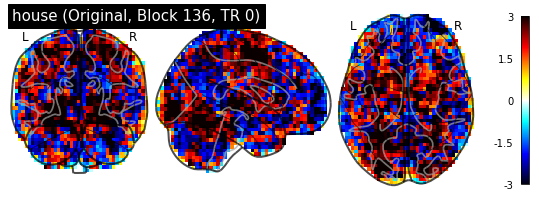

05/24/2020 18:27:12 Reconstruction Error (Frobenius Norm): 1.16227730e+02 out of 6.82859863e+02


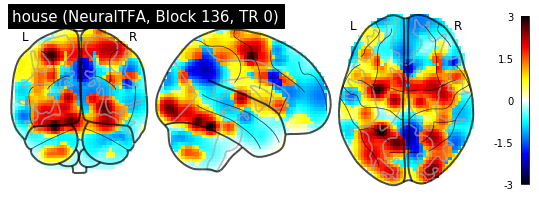

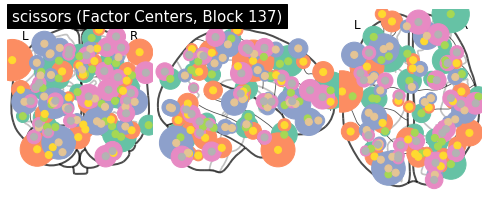

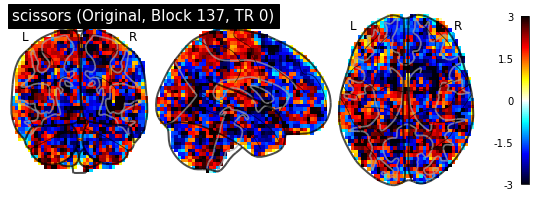

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/24/2020 18:27:15 Reconstruction Error (Frobenius Norm): 1.24829445e+02 out of 6.00198181e+02


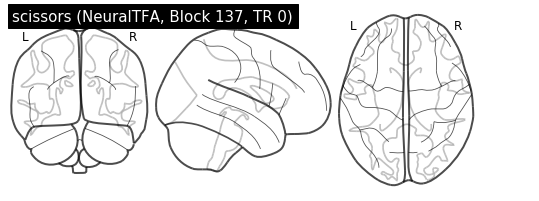

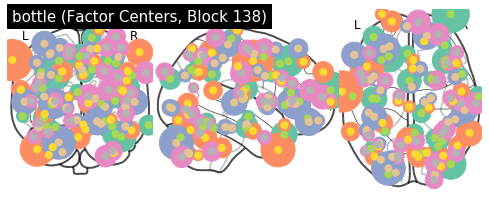

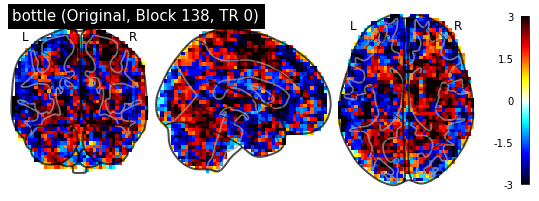

05/24/2020 18:27:18 Reconstruction Error (Frobenius Norm): 1.13028046e+02 out of 6.44000854e+02


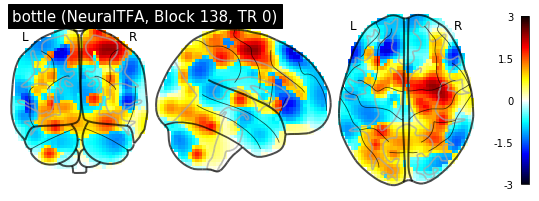

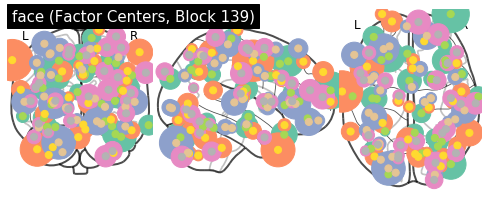

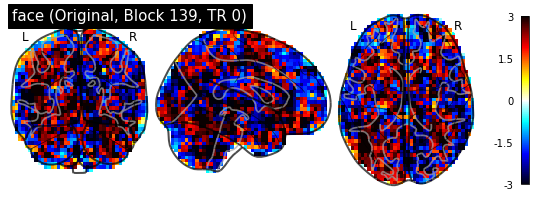

05/24/2020 18:27:20 Reconstruction Error (Frobenius Norm): 1.20893494e+02 out of 6.50583679e+02


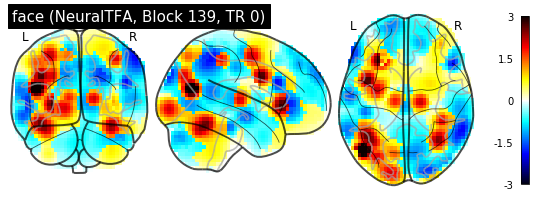

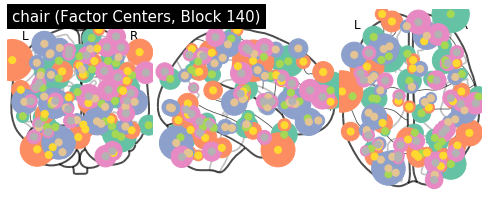

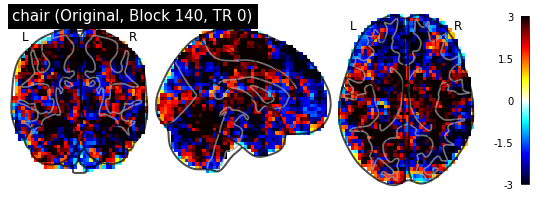

05/24/2020 18:27:23 Reconstruction Error (Frobenius Norm): 1.13444305e+02 out of 6.13922791e+02


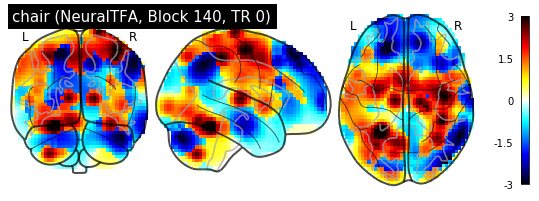

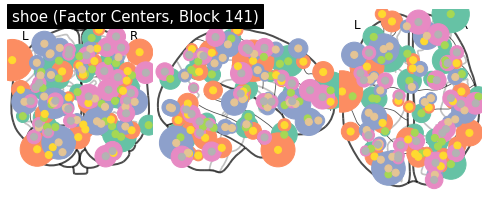

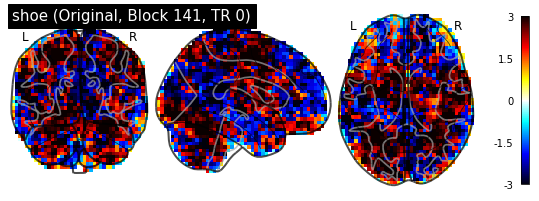

05/24/2020 18:27:26 Reconstruction Error (Frobenius Norm): 1.09665207e+02 out of 6.20156250e+02


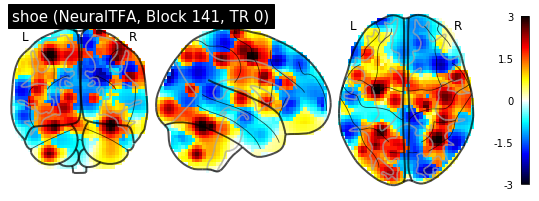

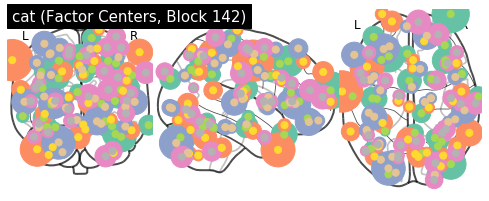

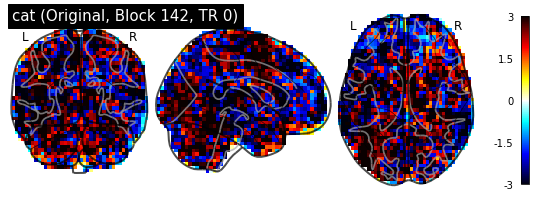

05/24/2020 18:27:29 Reconstruction Error (Frobenius Norm): 1.14340691e+02 out of 6.38475952e+02


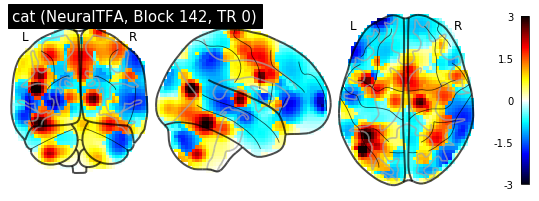

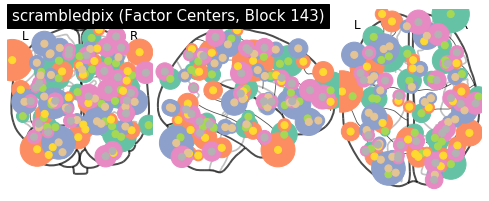

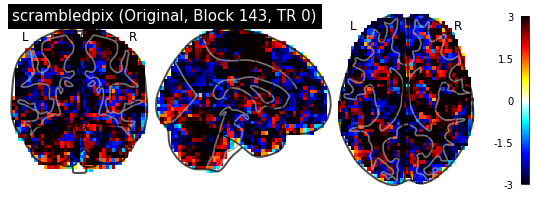

05/24/2020 18:27:32 Reconstruction Error (Frobenius Norm): 1.21027161e+02 out of 6.73383118e+02


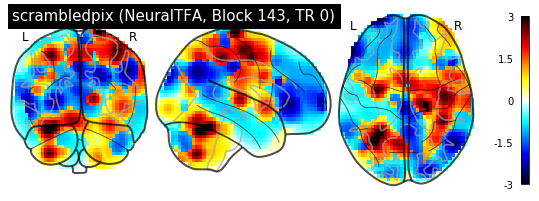

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

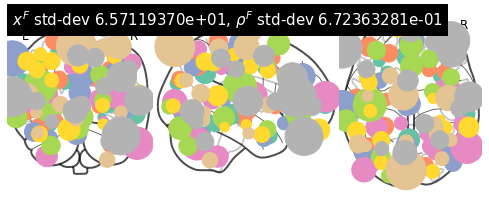

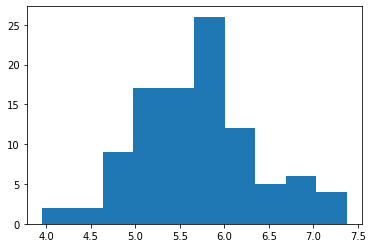

(<nilearn.plotting.displays.OrthoProjector at 0x7f795ff43a50>,
 tensor([[-5.9834e+01, -2.9409e+01,  2.5667e+01],
         [ 3.7009e+01, -5.7805e+01, -2.4121e+01],
         [ 4.3891e+01,  2.0800e+00,  3.8260e+01],
         [ 2.9079e+01,  6.8645e+01,  1.9978e+00],
         [-1.0525e+00, -5.7733e+01,  3.5000e+01],
         [-3.2344e+01,  2.5173e+01,  4.9389e+00],
         [-3.1260e+01, -4.6841e+01, -2.0515e+01],
         [-2.3622e+01,  1.2324e+01,  5.7326e+01],
         [ 5.7811e+01, -3.0571e+01, -8.7476e+00],
         [ 2.2925e+01, -5.4159e+01, -1.2129e+01],
         [-3.4008e+00,  3.0140e+01,  2.4980e+01],
         [-1.5849e+01, -8.7632e+01,  2.3957e+01],
         [ 3.2962e+01,  9.6311e+00, -3.1168e+01],
         [-2.4403e+01, -1.5446e+01, -1.6000e+01],
         [ 3.0041e+01, -6.5540e+01,  3.9591e+01],
         [-4.3322e+01, -6.6201e+01,  4.2460e+01],
         [ 4.2200e+01,  4.5514e+01, -1.0437e+00],
         [ 2.0096e+01,  1.6067e+01, -3.5871e-01],
         [ 3.4205e+01, -7.2171e+01, -

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

05/24/2020 18:27:45 Average reconstruction error (MSE): 5.04632746e+02 +/- 3.90382245e+01
05/24/2020 18:27:45 Average data norm (Euclidean): 6.03396825e+02 +/- 6.17218783e+01
05/24/2020 18:27:45 Percent average reconstruction error: 83.886473 +/- 3.38073641e+00


(array([560.95233154, 532.38354492, 501.62741089, 508.18972778,
        528.30822754, 510.6242981 , 515.24987793, 483.97360229,
        556.82208252, 526.89331055, 499.4211731 , 448.82641602,
        470.99987793, 487.15579224, 549.99072266, 540.07397461,
        500.07992554, 495.96572876, 468.46655273, 502.21936035,
        477.6786499 , 530.85943604, 499.41976929, 510.94137573,
        616.67779541, 550.03845215, 510.55502319, 535.33886719,
        477.11761475, 513.94464111, 515.34735107, 475.93499756,
        587.83483887, 524.58343506, 467.79959106, 491.17904663,
        532.55493164, 491.14074707, 507.12631226, 539.31256104,
        598.17602539, 498.93188477, 497.16549683, 520.40411377,
        524.97717285, 507.10498047, 542.50170898, 489.29571533,
        521.54711914, 532.72357178, 483.52926636, 456.04125977,
        506.30593872, 554.25811768, 517.83441162, 548.29608154,
        451.4800415 , 449.87924194, 468.65490723, 447.41592407,
        461.50158691, 466.26577759, 430.